This tool creates ML models with the given datasets.

In [1]:
import pandas as pd
import csv
import os

In [2]:
import re

def split_number(s):
    return list(filter(None, re.split(r'(\d+)', s)))

Our labels, separated by category.

In [3]:
basic_stats = [
    'up_bytes_mean', 'up_bytes_median', 'up_bytes_std', 'up_bytes_var', 'up_bytes_skew', 'up_bytes_kurt',
    'up_bytes_perc25', 'up_bytes_perc50', 'up_bytes_perc75', 'up_bytes_perc90',
    'up_packet_mean', 'up_packet_median', 'up_packet_std', 'up_packet_var', 'up_packet_skew', 'up_packet_kurt',
    'up_packet_perc25', 'up_packet_perc50', 'up_packet_perc75', 'up_packet_perc90',
    'down_bytes_mean', 'down_bytes_median', 'down_bytes_std', 'down_bytes_var', 'down_bytes_skew', 'down_bytes_kurt',
    'down_bytes_perc25', 'down_bytes_perc50', 'down_bytes_perc75', 'down_bytes_perc90',
    'down_packet_mean', 'down_packet_median', 'down_packet_std', 'down_packet_var', 'down_packet_skew', 'down_packet_kurt',
    'down_packet_perc25', 'down_packet_perc50', 'down_packet_perc75', 'down_packet_perc90']

silences = ['down_bytes_silences', 'down_bytes_silence_mean', 'down_bytes_longest_silence', 'down_bytes_shortest_silence',
           'up_bytes_silences', 'up_bytes_silence_mean', 'up_bytes_longest_silence', 'up_bytes_shortest_silence']


scalogram_1 = ['up_bytes_1max_y', 'up_bytes_1max_x', 'up_bytes_1min_y', 'up_bytes_1min_x',  
    'up_packet_1max_y', 'up_packet_1max_x', 'up_packet_1min_y', 'up_packet_1min_x', 'down_bytes_1max_y',
    'down_bytes_1max_x',    'down_bytes_1min_y', 'down_bytes_1min_x', 'down_packet_1max_y',
    'down_packet_1max_x', 'down_packet_1min_y', 'down_packet_1min_x']

scalogram_2 = ['up_bytes_2max_y', 'up_bytes_2max_x', 'up_bytes_2min_y', 'up_bytes_2min_x',  
    'up_packet_2max_y', 'up_packet_2max_x', 'up_packet_2min_y', 'up_packet_2min_x', 'down_bytes_2max_y',
    'down_bytes_2max_x',    'down_bytes_2min_y', 'down_bytes_2min_x', 'down_packet_2max_y',
    'down_packet_2max_x','down_packet_2min_y','down_packet_2min_x']

scalogram_3 = ['up_bytes_3max_y', 'up_bytes_3max_x', 'up_bytes_3min_y', 'up_bytes_3min_x',  
    'up_packet_3max_y', 'up_packet_3max_x', 'up_packet_3min_y', 'up_packet_3min_x', 'up_packet_3min_y',
    'down_bytes_3max_y', 'down_packet_3min_y', 'down_bytes_3max_x', 'down_bytes_3min_y',
    'down_bytes_3min_x', 'down_packet_3max_y','down_packet_3max_x','down_packet_3min_y','down_packet_3min_x']
scalogram_4 = ['up_bytes_4max_y', 'up_bytes_4max_x', 'up_bytes_4min_y', 'up_bytes_4min_x',  
    'up_packet_4max_y', 'up_packet_4max_x', 'up_packet_4min_y', 'up_packet_4min_x', 'down_bytes_4max_y',
    'down_bytes_4max_x',    'down_bytes_4min_y', 'down_bytes_4min_x', 'down_packet_4max_y',
    'down_packet_4max_x','down_packet_4min_y','down_packet_4min_x']
scalogram_5 = ['up_bytes_5max_y', 'up_bytes_5max_x', 'up_bytes_5min_y', 'up_bytes_5min_x',  
    'up_packet_5max_y', 'up_packet_5max_x', 'up_packet_5min_y', 'up_packet_5min_x', 'down_bytes_5max_y',
    'down_bytes_5max_x',    'down_bytes_5min_y', 'down_bytes_5min_x', 'down_packet_5max_y',
    'down_packet_5max_x','down_packet_5min_y','down_packet_5min_x']

scalogram = scalogram_1 + scalogram_2 + scalogram_3 + scalogram_4 + scalogram_5

Load the dataset.

In [4]:
base_folder = "csv/"
file_name = 'all_30s_1s_128.csv'

dataset = pd.read_csv(os.path.join(str(base_folder), str(file_name)))

dataset = dataset.drop(columns=['Unnamed: 0']).reset_index()
dataset.drop(columns=['index', 'up_packet_silence_mean', 'down_packet_silence_mean',
                      'down_packet_longest_silence', 'down_packet_shortest_silence'], inplace=True)
features = dataset.columns
print(features)
print(len(features))

Index(['up_bytes_mean', 'up_bytes_median', 'up_bytes_std', 'up_bytes_var',
       'up_bytes_skew', 'up_bytes_kurt', 'up_bytes_perc25', 'up_bytes_perc50',
       'up_bytes_perc75', 'up_bytes_perc90',
       ...
       'down_packet_2min_y', 'down_packet_3min_y', 'down_packet_4min_y',
       'down_packet_5min_y', 'down_packet_1min_x', 'down_packet_2min_x',
       'down_packet_3min_x', 'down_packet_4min_x', 'down_packet_5min_x',
       'label'],
      dtype='object', length=133)
133


Choose the labels to consider.


In [5]:
dataset_tunnel = dataset[dataset['label'] == 'netflix-openvpn']
dataset_tunnel = dataset_tunnel.append(dataset[dataset['label'] == 'netflix-ssh'])
dataset_tunnel = dataset_tunnel.append(dataset[dataset['label'] == 'youtube-openvpn'])
dataset_tunnel = dataset_tunnel.append(dataset[dataset['label'] == 'youtube-ssh'])
dataset_tunnel = dataset_tunnel.append(dataset[dataset['label'] == 'twitch-ssh'])
dataset_tunnel = dataset_tunnel.append(dataset[dataset['label'] == 'twitch-openvpn'])
dataset_tunnel = dataset_tunnel.append(dataset[dataset['label'] == 'acestream-openvpn'])

# Prepare tunnel dataset for testing
dataset_tunnel.loc[dataset_tunnel['label'] == 'netflix-ssh', 'label'] = 'netflix'
dataset_tunnel.loc[dataset_tunnel['label'] == 'youtube-ssh', 'label'] = 'youtube'
dataset_tunnel.loc[dataset_tunnel['label'] == 'twitch-ssh', 'label'] = 'twitch'
dataset_tunnel.loc[dataset_tunnel['label'] == 'netflix-openvpn', 'label'] = 'netflix'
dataset_tunnel.loc[dataset_tunnel['label'] == 'youtube-openvpn', 'label'] = 'youtube'
dataset_tunnel.loc[dataset_tunnel['label'] == 'twitch-openvpn', 'label'] = 'twitch'
dataset_tunnel.loc[dataset_tunnel['label'] == 'acestream-openvpn', 'label'] = 'acestream'

# Prepare regular dataset for training
dataset.loc[dataset['label'] == 'browsing-openvpn', 'label'] = 'browsing'
dataset.loc[dataset['label'] == 'reddit', 'label'] = 'browsing'
dataset.loc[dataset['label'] == 'facebook', 'label'] = 'browsing'

dataset_normal = dataset[dataset['label'] == 'netflix']
dataset_normal = dataset_normal.append(dataset[dataset['label'] == 'youtube'])
dataset_normal = dataset_normal.append(dataset[dataset['label'] == 'twitch'])
dataset_normal = dataset_normal.append(dataset[dataset['label'] == 'acestream'])


print(dataset_tunnel.shape[0])
print(dataset_tunnel['label'].value_counts())
print(dataset_normal.shape[0])
print(dataset_normal['label'].value_counts())
number_training_samples = dataset_normal.shape[0]
dataset = dataset_normal.append(dataset_tunnel)

763
netflix      268
twitch       250
youtube      160
acestream     85
Name: label, dtype: int64
881
youtube      305
netflix      287
acestream    167
twitch       122
Name: label, dtype: int64


Factorize the labels.

In [6]:
prevlabel = dataset['label']
dataset['label'] = pd.factorize(dataset['label'])[0]
labels = dataset['label']
dataset['label'].value_counts()

0    555
1    465
2    372
3    252
Name: label, dtype: int64

Check correlation matrix.

In [7]:
dataset.corr()['label'].sort_values(ascending=False)

label                          1.000000
up_bytes_silence_mean          0.641791
down_bytes_silence_mean        0.634694
up_packet_shortest_silence     0.529798
up_bytes_shortest_silence      0.529798
down_bytes_shortest_silence    0.529290
up_packet_perc50               0.436442
up_packet_median               0.436442
up_bytes_longest_silence       0.409465
up_packet_longest_silence      0.409465
up_packet_perc25               0.408085
down_bytes_longest_silence     0.402576
up_packet_1min_y               0.385838
down_packet_1min_y             0.371357
down_bytes_1min_y              0.361301
up_packet_perc75               0.339423
up_packet_mean                 0.319667
down_packet_2max_x             0.272668
up_packet_2max_x               0.264035
down_packet_perc25             0.256643
down_packet_median             0.251344
down_packet_perc50             0.251344
down_bytes_2max_x              0.241655
up_packet_1max_y               0.237182
down_packet_1max_y             0.218363


Imputer for Nan values.

In [8]:
from sklearn.preprocessing import Imputer
labels = dataset['label']
imputer = Imputer(strategy="median")
imputer.fit(dataset)
dataset = pd.DataFrame(imputer.transform(dataset), columns=dataset.columns)


Normalize features (if needed)

In [9]:

from sklearn.preprocessing import StandardScaler
import numpy as np

labels = dataset['label']
dataset_no_label = dataset.loc[:, dataset.columns != 'label']
to_scale = dataset_no_label
scaler = StandardScaler()
scaled = scaler.fit_transform(to_scale)

dataset = pd.DataFrame(scaled)
#joblib.dump(scaler, '../models/std_scaler_' + sampling_interval + '_' + str(sample_size) + '.sav')
dataset['label'] = labels


In [10]:
dataset['label'].isna().any()

False

Apply PCA

In [11]:
#PCA

from sklearn.decomposition import PCA

labels = dataset['label']
dataset_no_label = dataset.loc[:, dataset.columns != 'label']

pca = PCA(n_components=10)
main_components = pca.fit_transform(dataset_no_label)
dataset = pd.DataFrame(data = main_components)
dataset['label'] = labels

dataset['label'].isna().any()


False

In [12]:
from sklearn.model_selection import train_test_split

train = dataset.iloc[:number_training_samples, :]
test = dataset.iloc[number_training_samples:, :]

y_train = train['label']
x_train = train.drop(columns=['label'])

y_test = test['label']
x_test = test.drop(columns=['label'])

In [13]:
print(len(train))
print(len(test))

881
763


In [14]:
y_train_youtube = (y_train == 0)
y_train_netflix = (y_train == 1)
y_train_twitch = (y_train == 2)
y_train_acestream = (y_train == 3)

In [15]:
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score

import matplotlib.pyplot as plt

def do_test_forest(model):
    
    y_probas_y = cross_val_predict(model, x_train, y_train_youtube, cv=10, method="predict_proba")
    y_probas_n = cross_val_predict(model, x_train, y_train_netflix, cv=10, method="predict_proba")
    y_probas_t = cross_val_predict(model, x_train, y_train_twitch, cv=10, method="predict_proba")
    y_probas_a = cross_val_predict(model, x_train, y_train_acestream, cv=10, method="predict_proba")
    y_probas = cross_val_predict(model, x_train, y_train, cv=10, method="predict_proba")
    
    y_scores_y = y_probas_y[:, 1]
    y_scores_n = y_probas_n[:, 1]
    y_scores_t = y_probas_t[:, 1]
    y_scores_a = y_probas_a[:, 1]


    fpr_y, tpr_y, thresholds_y = roc_curve(y_train_youtube, y_scores_y)
    fpr_n, tpr_n, thresholds_n = roc_curve(y_train_netflix, y_scores_n)
    fpr_t, tpr_t, thresholds_t = roc_curve(y_train_twitch, y_scores_t)
    fpr_a, tpr_a, thresholds_a = roc_curve(y_train_acestream, y_scores_a)
    

    plot_roc_curve(fpr_y, tpr_y, "YouTube")
    plot_roc_curve(fpr_n, tpr_n, "Netflix")
    plot_roc_curve(fpr_t, tpr_t, "Twitch")
    plot_roc_curve(fpr_t, tpr_t, "Acestream")
   
    #plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")

    plt.legend(loc="lower right")
    plt.show()
    #cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring='accuracy')
    #accuracy = sum(cvs)/len(cvs)
    #print("Accuracy: " + str(accuracy))
    
    cv_yt = cross_val_score(model, x_train, y_train_youtube, cv=10, scoring="accuracy")
    cv_nf = cross_val_score(model, x_train, y_train_netflix, cv=10, scoring="accuracy")
    cv_tw = cross_val_score(model, x_train, y_train_twitch, cv=10, scoring="accuracy")
    cv_ac = cross_val_score(model, x_train, y_train_acestream, cv=10, scoring="accuracy")
    
    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    
    
    print("YouTube: ")
    print("\tCrossValScore: " + str(sum(cv_yt)/len(cv_yt)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_youtube, y_scores_y)))
    print("Netflix: ")
    print("\tCrossValScore: " + str(sum(cv_nf)/len(cv_nf)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_netflix, y_scores_n)))
    print("Twitch: ")
    print("\tCrossValScore: " + str(sum(cv_tw)/len(cv_tw)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_twitch, y_scores_t)))
    print("Acestream: ")
    print("\tCrossValScore: " + str(sum(cv_ac)/len(cv_ac)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_acestream, y_scores_a)))
    
    print("Multiclass: ")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))
    
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    
    print(conf_mx)
    
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

In [17]:
def do_test_forest_ovo(model):

    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    
    print(conf_mx)    
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

In [18]:
from sklearn.decomposition import PCA

def do_test_svm(model):    
    
    y_probas_y = cross_val_predict(model, x_train, y_train_youtube, cv=10, method="predict_proba")
    y_probas_n = cross_val_predict(model, x_train, y_train_netflix, cv=10, method="predict_proba")
    y_probas_t = cross_val_predict(model, x_train, y_train_twitch, cv=10, method="predict_proba")
    y_probas_a = cross_val_predict(model, x_train, y_train_acestream, cv=10, method="predict_proba")
    y_probas = cross_val_predict(model, x_train, y_train, cv=10, method="predict_proba")
    
    y_scores_y = y_probas_y[:, 1]
    y_scores_n = y_probas_n[:, 1]
    y_scores_t = y_probas_t[:, 1]
    y_scores_a = y_probas_a[:, 1]

    
    fpr_y, tpr_y, thresholds_y = roc_curve(y_train_youtube, y_scores_y)
    fpr_n, tpr_n, thresholds_n = roc_curve(y_train_netflix, y_scores_n)
    fpr_t, tpr_t, thresholds_t = roc_curve(y_train_twitch, y_scores_t)
    fpr_a, tpr_a, thresholds_a = roc_curve(y_train_acestream, y_scores_a)
    

    plot_roc_curve(fpr_y, tpr_y, "YouTube")
    plot_roc_curve(fpr_n, tpr_n, "Netflix")
    plot_roc_curve(fpr_t, tpr_t, "Twitch")
    plot_roc_curve(fpr_t, tpr_t, "Acestream")
   
    #plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")

    plt.legend(loc="lower right")
    plt.show()
    #cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring='accuracy')
    #accuracy = sum(cvs)/len(cvs)
    #print("Accuracy: " + str(accuracy))
    
    cv_yt = cross_val_score(model, x_train, y_train_youtube, cv=10, scoring="accuracy")
    cv_nf = cross_val_score(model, x_train, y_train_netflix, cv=10, scoring="accuracy")
    cv_tw = cross_val_score(model, x_train, y_train_twitch, cv=10, scoring="accuracy")
    cv_ac = cross_val_score(model, x_train, y_train_acestream, cv=10, scoring="accuracy")
    
    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    
    print("YouTube: ")
    print("\tCrossValScore: " + str(sum(cv_yt)/len(cv_yt)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_youtube, y_scores_y)))
    print("Netflix: ")
    print("\tCrossValScore: " + str(sum(cv_nf)/len(cv_nf)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_netflix, y_scores_n)))
    print("Twitch: ")
    print("\tCrossValScore: " + str(sum(cv_tw)/len(cv_tw)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_twitch, y_scores_t)))
    print("Acestream: ")
    print("\tCrossValScore: " + str(sum(cv_ac)/len(cv_ac)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_acestream, y_scores_a)))
    
    print("Multiclass: ")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))
    
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    
    print(conf_mx)
    
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

In [19]:
from sklearn.decomposition import PCA

def do_test_knn(model):    
    
    y_probas_y = cross_val_predict(model, x_train, y_train_youtube, cv=10, method="predict_proba")
    y_probas_n = cross_val_predict(model, x_train, y_train_netflix, cv=10, method="predict_proba")
    y_probas_t = cross_val_predict(model, x_train, y_train_twitch, cv=10, method="predict_proba")
    y_probas_a = cross_val_predict(model, x_train, y_train_acestream, cv=10, method="predict_proba")
    y_probas = cross_val_predict(model, x_train, y_train, cv=10, method="predict_proba")
    
    y_scores_y = y_probas_y[:, 1]
    y_scores_n = y_probas_n[:, 1]
    y_scores_t = y_probas_t[:, 1]
    y_scores_a = y_probas_a[:, 1]

    
    fpr_y, tpr_y, thresholds_y = roc_curve(y_train_youtube, y_scores_y)
    fpr_n, tpr_n, thresholds_n = roc_curve(y_train_netflix, y_scores_n)
    fpr_t, tpr_t, thresholds_t = roc_curve(y_train_twitch, y_scores_t)
    fpr_a, tpr_a, thresholds_a = roc_curve(y_train_acestream, y_scores_a)
    

    plot_roc_curve(fpr_y, tpr_y, "YouTube")
    plot_roc_curve(fpr_n, tpr_n, "Netflix")
    plot_roc_curve(fpr_t, tpr_t, "Twitch")
    plot_roc_curve(fpr_t, tpr_t, "Acestream")
   
    #plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")

    plt.legend(loc="lower right")
    plt.show()
    #cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring='accuracy')
    #accuracy = sum(cvs)/len(cvs)
    #print("Accuracy: " + str(accuracy))
    
    cv_yt = cross_val_score(model, x_train, y_train_youtube, cv=10, scoring="accuracy")
    cv_nf = cross_val_score(model, x_train, y_train_netflix, cv=10, scoring="accuracy")
    cv_tw = cross_val_score(model, x_train, y_train_twitch, cv=10, scoring="accuracy")
    cv_ac = cross_val_score(model, x_train, y_train_acestream, cv=10, scoring="accuracy")
    
    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    
    print("YouTube: ")
    print("\tCrossValScore: " + str(sum(cv_yt)/len(cv_yt)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_youtube, y_scores_y)))
    print("Netflix: ")
    print("\tCrossValScore: " + str(sum(cv_nf)/len(cv_nf)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_netflix, y_scores_n)))
    print("Twitch: ")
    print("\tCrossValScore: " + str(sum(cv_tw)/len(cv_tw)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_twitch, y_scores_t)))
    print("Acestream: ")
    print("\tCrossValScore: " + str(sum(cv_ac)/len(cv_ac)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_acestream, y_scores_a)))
    
    print("Multiclass: ")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))
    
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    
    print(conf_mx)
    
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

-----Random Forest------


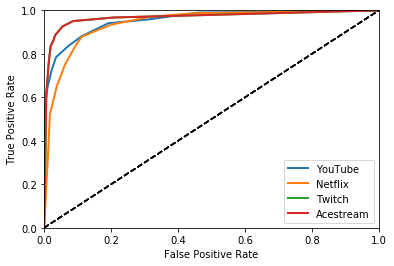

YouTube: 
	CrossValScore: 0.9061510102966901
	RocAucScore:  0.955545583594364
Netflix: 
	CrossValScore: 0.8836764585021074
	RocAucScore:  0.9418431238615665
Twitch: 
	CrossValScore: 0.9602902328202599
	RocAucScore:  0.9679798699755933
Acestream: 
	CrossValScore: 0.9988764044943821
	RocAucScore:  0.9967795501434107
Multiclass: 
	CrossValScore: 0.8905279275641179
[[155  47  64   2]
 [ 20 133   7   0]
 [ 87  20 143   0]
 [ 10   1  74   0]]

Accuracy train set: 0.9954597048808173
Accuracy test set: 0.564875491480996
-----OvO Classifier Random Forest------
[[164  46  56   2]
 [ 26 132   2   0]
 [103  14 133   0]
 [  3   1  81   0]]

Accuracy train set: 0.9920544835414302
Accuracy test set: 0.562254259501966
-----OvR Classifier Random Forest------
[[146  56  64   2]
 [ 21 136   3   0]
 [ 96  20 134   0]
 [  4   3  78   0]]

Accuracy train set: 0.996594778660613
Accuracy test set: 0.54521625163827
----------SVM-----------


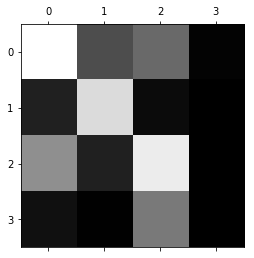

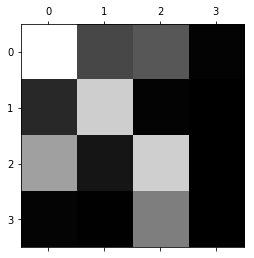

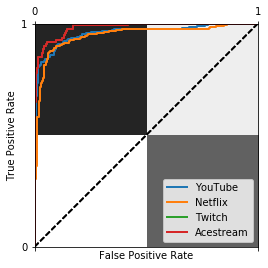

YouTube: 
	CrossValScore: 0.9230681964941942
	RocAucScore:  0.9572613475052499
Netflix: 
	CrossValScore: 0.9085502447958861
	RocAucScore:  0.9475922131147541
Twitch: 
	CrossValScore: 0.9602258051260375
	RocAucScore:  0.9807447245080888
Acestream: 
	CrossValScore: 0.9988764044943821
	RocAucScore:  0.9941629346349318
Multiclass: 
	CrossValScore: 0.8982087137378489
[[ 99 108  59   2]
 [ 14 139   7   0]
 [ 26 136  88   0]
 [  0  85   0   0]]

Accuracy train set: 0.9738933030646992
Accuracy test set: 0.4272608125819135
----------Knn-----------


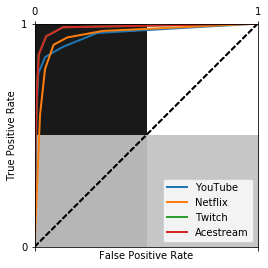

YouTube: 
	CrossValScore: 0.9197635987930448
	RocAucScore:  0.9495242787925714
Netflix: 
	CrossValScore: 0.9119343864839795
	RocAucScore:  0.9464907786885246
Twitch: 
	CrossValScore: 0.9647715531917391
	RocAucScore:  0.9791950150111234
Acestream: 
	CrossValScore: 0.9988764044943821
	RocAucScore:  0.9969640550831111
Multiclass: 
	CrossValScore: 0.9029275245266885
[[113  59  94   2]
 [ 12 138  10   0]
 [105  12 133   0]
 [  2  18  65   0]]

Accuracy train set: 0.9375709421112373
Accuracy test set: 0.5032765399737876
-----Neural Network-----


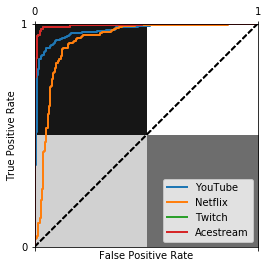

YouTube: 
	CrossValScore: 0.9289189355781764
	RocAucScore:  0.967614589565809
Netflix: 
	CrossValScore: 0.891747678254846
	RocAucScore:  0.9221254553734062
Twitch: 
	CrossValScore: 0.9818437180796732
	RocAucScore:  0.9905937493250394
Acestream: 
	CrossValScore: 0.9988764044943821
	RocAucScore:  0.9963602207350005
Multiclass: 
	CrossValScore: 0.9166312920160582
[[129  63  72   4]
 [ 22 135   3   0]
 [102  11 135   2]
 [  0   6  79   0]]

Accuracy train set: 0.9829738933030647
Accuracy test set: 0.5229357798165137
--------AdaBoost Random Forest--------


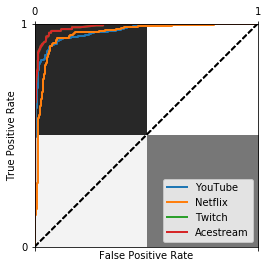

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier

print("-----Random Forest------")
rf = RandomForestClassifier(random_state=14)

do_test_forest(rf)

print("-----OvO Classifier Random Forest------")

rf = OneVsOneClassifier(rf)
do_test_forest_ovo(rf)

print("-----OvR Classifier Random Forest------")

rf = OneVsRestClassifier(rf)
do_test_forest_ovo(rf)

print("----------SVM-----------")
svm = SVC(random_state=42, probability=True)
do_test_svm(svm)


print("----------Knn-----------")
knn = KNeighborsClassifier()
do_test_knn(knn)

print("-----Neural Network-----")
nn = MLPClassifier(max_iter=1000)
do_test_knn(nn)


print("--------AdaBoost Random Forest--------")

rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy', max_depth=9,
                            max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1, oob_score=False,
                            random_state=42, verbose=0, warm_start=False)

ada_clf = AdaBoostClassifier(
    rf,
    algorithm="SAMME.R", learning_rate=0.5
)
do_test_forest(ada_clf)

print("---------Decision Tree------")
dt = DecisionTreeClassifier(random_state=42)

do_test_forest(dt)

print("--------AdaBoost Decision Tree--------")

dt = DecisionTreeClassifier(random_state=42)

ada_clf = AdaBoostClassifier(
    dt,
    algorithm="SAMME.R", learning_rate=0.5
)
do_test_forest(ada_clf)

